In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_rec=pd.read_csv('application_record.csv')
app_rec.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
print(app_rec.dtypes)

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


In [3]:
cre_rec=pd.read_csv('credit_record.csv')
cre_rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


<AxesSubplot:>

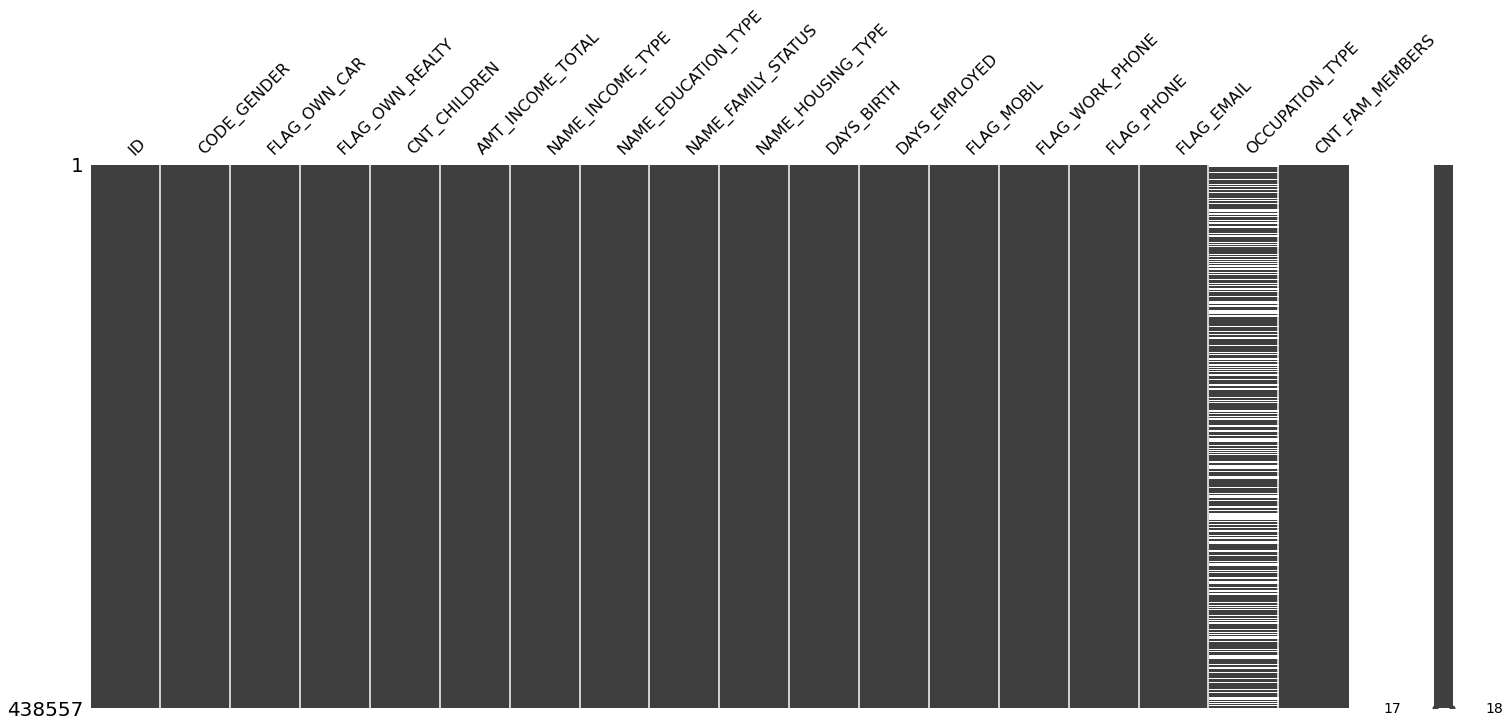

In [4]:
import missingno as mno
mno.matrix(app_rec)

<AxesSubplot:>

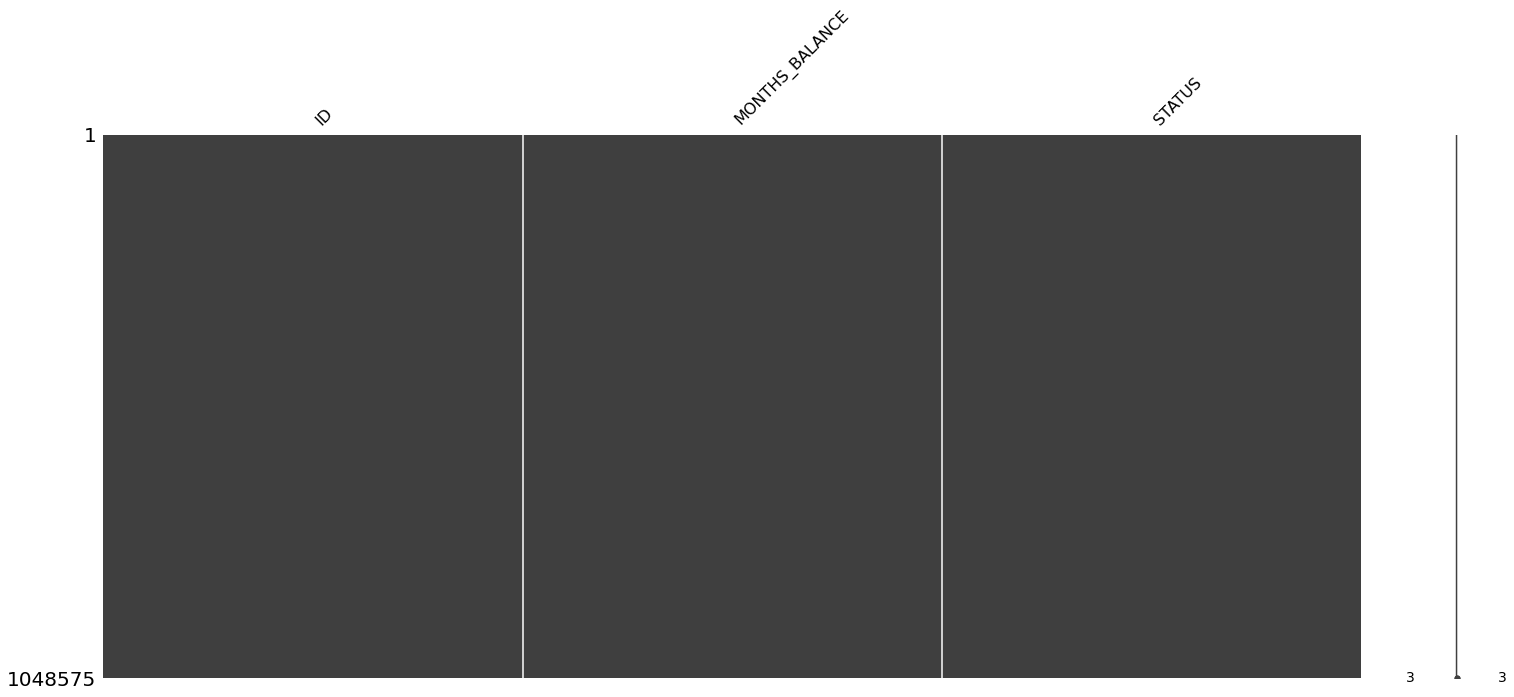

In [10]:
mno.matrix(cre_rec)

In [5]:
credit_grouped=pd.get_dummies(data=cre_rec,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(cre_rec['STATUS'].unique().tolist())].sum()
credit_grouped['Good_Debt'] = credit_grouped[['0','1','C','X']].sum(axis=1)
credit_grouped['Bad_Debt'] = credit_grouped[['2','3','4','5']].sum(axis=1)

credit_grouped['target'] = None
credit_grouped['target'][credit_grouped['Bad_Debt']==0]=0
credit_grouped['target'][credit_grouped['Bad_Debt']>0]=1
credit_grouped

,0,1,2,3,4,5,C,X,Good_Debt,Bad_Debt,target
ID,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,0
5001712,10,0,0,0,0,0,9,0,19,0,0
5001713,0,0,0,0,0,0,0,22,22,0,0
5001714,0,0,0,0,0,0,0,15,15,0,0
5001715,0,0,0,0,0,0,0,60,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0,18,0,0
5150483,0,0,0,0,0,0,0,18,18,0,0
5150484,12,0,0,0,0,0,1,0,13,0,0


In [16]:
credit_grouped['target'].value_counts()

0    45318
1      667
Name: target, dtype: int64

[[Text(0, 0, 'Good'), Text(1, 0, 'Bad')]]

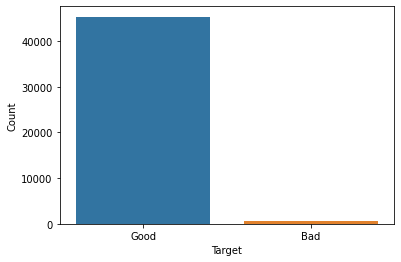

In [17]:
ax= sns.countplot(x='target', data=credit_grouped)
ax.set_xlabel("Target")
ax.set_ylabel("Count")
ax.set(xticklabels=["Good", "Bad"])

In [6]:
sub_cgroup=credit_grouped['target']
new_data=pd.merge(app_rec,sub_cgroup,how='inner',on='ID')
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


<AxesSubplot:>

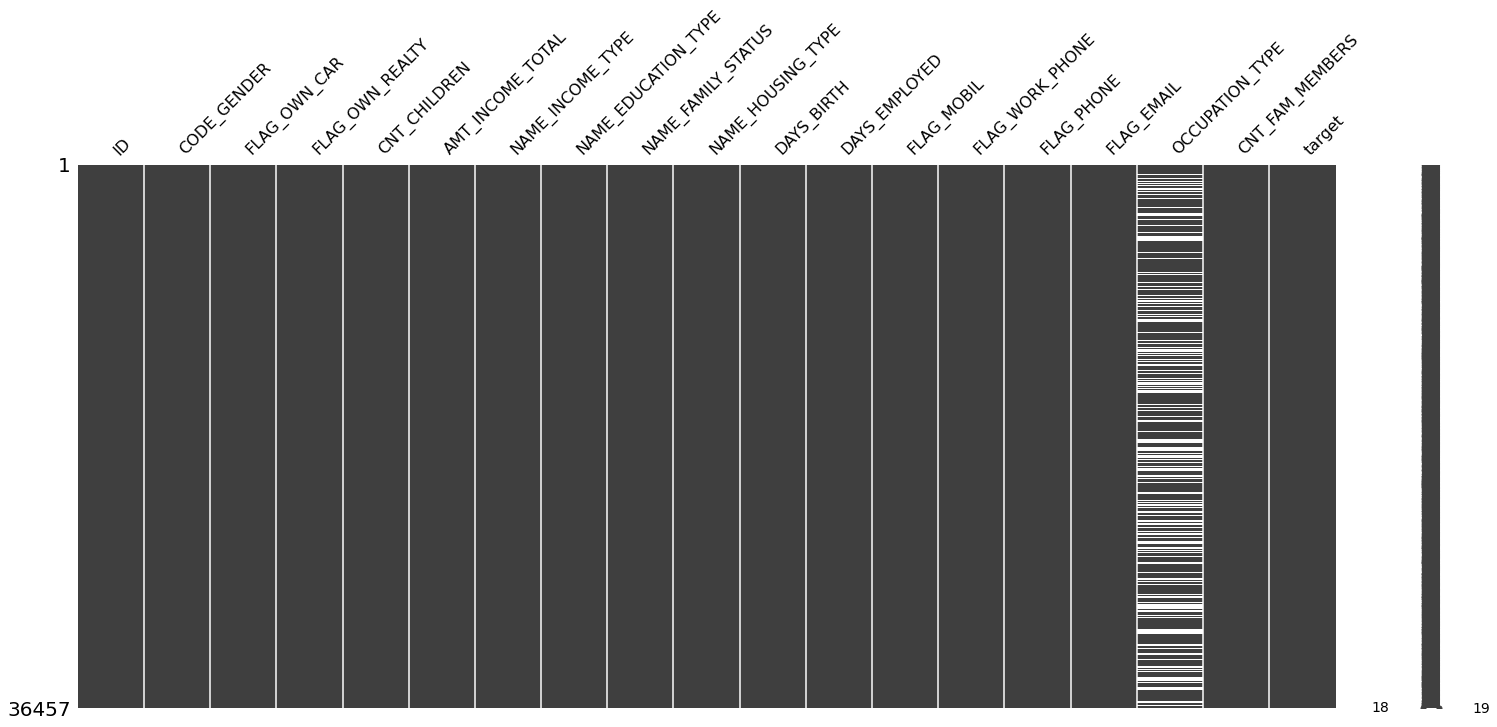

In [7]:
mno.matrix(new_data)

In [8]:
new_data['OCCUPATION_TYPE'].isna().sum()

11323

In [9]:
new_data.dropna(axis=0, inplace=True)
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


In [10]:
object_columns = new_data.columns[new_data.dtypes =='object'].tolist()

unique_counts = pd.DataFrame.from_records([(col, new_data[object_columns][col].nunique()) for col in new_data[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts

,Column_Name,Num_Unique
0,CODE_GENDER,2
1,FLAG_OWN_CAR,2
2,FLAG_OWN_REALTY,2
8,target,2
3,NAME_INCOME_TYPE,5
4,NAME_EDUCATION_TYPE,5
5,NAME_FAMILY_STATUS,5
6,NAME_HOUSING_TYPE,6
7,OCCUPATION_TYPE,18


In [11]:
for x in new_data:
    if new_data[x].dtypes=='object':
        new_data[x] = new_data[x].astype("category")

In [12]:
new_data['FLAG_MOBIL'] = new_data['FLAG_MOBIL'].astype("category")
new_data['FLAG_WORK_PHONE'] = new_data['FLAG_WORK_PHONE'].astype("category")
new_data['FLAG_PHONE'] = new_data['FLAG_PHONE'].astype("category")
new_data['FLAG_EMAIL'] = new_data['FLAG_EMAIL'].astype("category")

In [13]:
new_data['DAYS_BIRTH']=-(new_data['DAYS_BIRTH'])//365
new_data['DAYS_EMPLOYED']=-(new_data['DAYS_EMPLOYED'])//365
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47,6,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,33,3,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33,3,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49,1,1,0,0,0,Sales staff,2.0,1


In [14]:
new_data.dtypes

ID                        int64
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL             category
FLAG_WORK_PHONE        category
FLAG_PHONE             category
FLAG_EMAIL             category
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS         float64
target                 category
dtype: object

Text(0.5, 1.0, 'Client Distribution by Car Ownership')

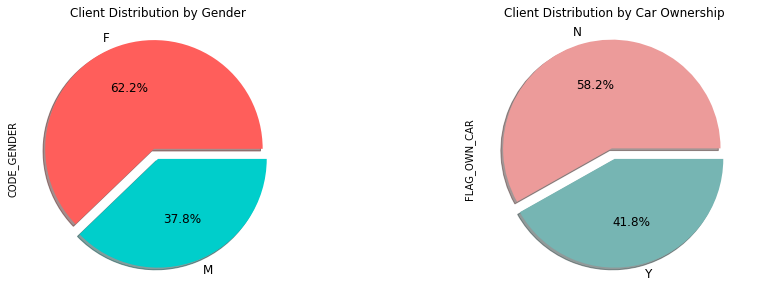

In [15]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)

g= new_data['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',shadow=True,
                                                   colors=['#FF5E5B', '#00CECB'],textprops = {'fontsize':12}, ax=axes[0])

g.set_title("Client Distribution by Gender")

c= new_data['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',shadow=True,
                                                   colors=['#EC9B9A', '#76B5B3'],textprops = {'fontsize':12}, ax=axes[1])

c.set_title("Client Distribution by Car Ownership")

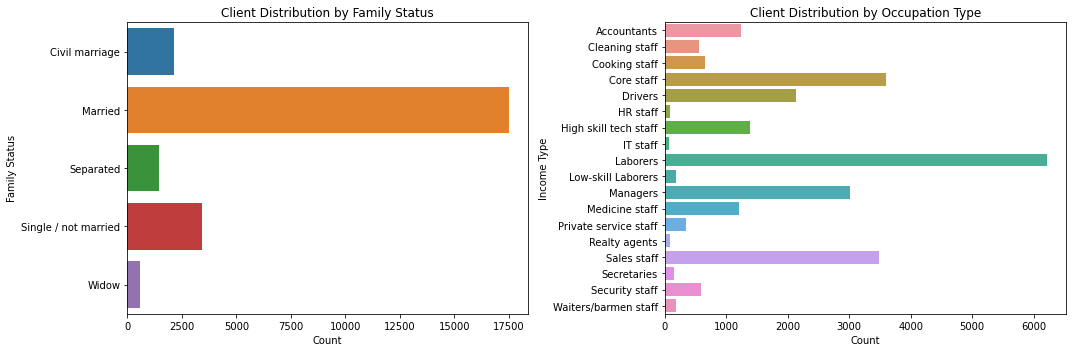

In [16]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)


f1=sns.countplot(y=new_data.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[0])
f1.set_title("Client Distribution by Family Status")
f1.set_xlabel("Count")
f1.set_ylabel("Family Status")


f2=sns.countplot(y=new_data.OCCUPATION_TYPE,linewidth=1.2, ax=axes[1])
f2.set_title("Client Distribution by Occupation Type")
f2.set_xlabel("Count")
f2.set_ylabel("Income Type")

plt.tight_layout()
plt.show()

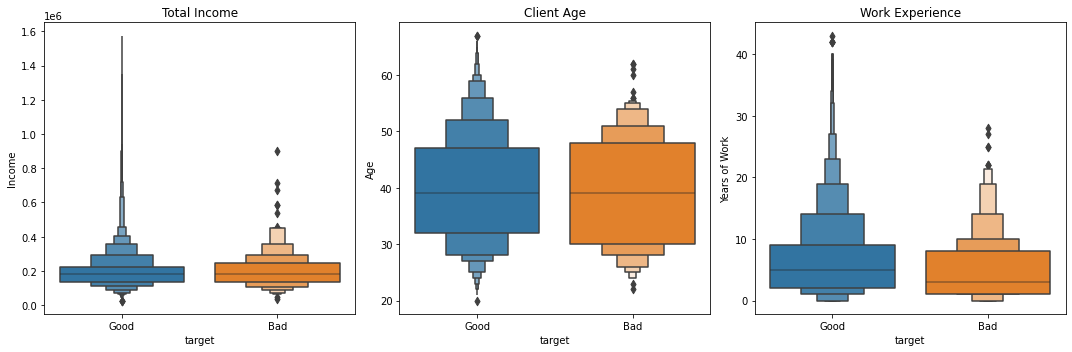

In [17]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,5)

f1=sns.boxenplot(x='target', y='AMT_INCOME_TOTAL', data=new_data, ax=axes[0])
f1.set_title("Total Income")
f1.set(xticklabels=["Good", "Bad"])
f1.set_ylabel("Income")

f2=sns.boxenplot(x='target', y='DAYS_BIRTH', data=new_data, ax=axes[1])
f2.set_title("Client Age")
f2.set(xticklabels=["Good", "Bad"])
f2.set_ylabel("Age")

f3=sns.boxenplot(x='target', y='DAYS_EMPLOYED', data=new_data,ax=axes[2])
f3.set_title("Work Experience")
f3.set(xticklabels=["Good", "Bad"])
f3.set_ylabel("Years of Work")

plt.tight_layout()

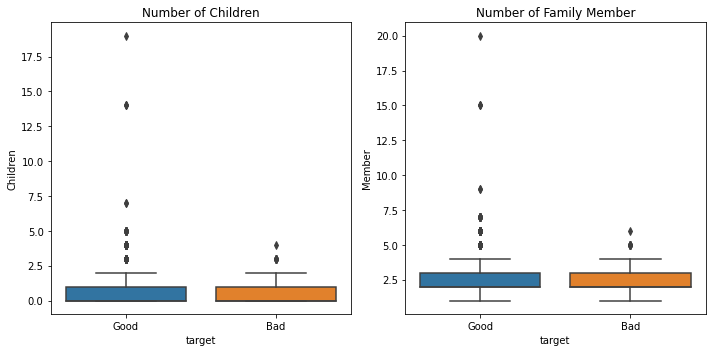

In [18]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,5)

f1=sns.boxplot(x='target', y='CNT_CHILDREN', data=new_data, ax=axes[0])
f1.set_title("Number of Children")
f1.set(xticklabels=["Good", "Bad"])
f1.set_ylabel("Children")

f2=sns.boxplot(x='target', y='CNT_FAM_MEMBERS', data=new_data, ax=axes[1])
f2.set_title("Number of Family Member")
f2.set(xticklabels=["Good", "Bad"])
f2.set_ylabel("Member")

plt.tight_layout()

## Modelling

In [20]:
from sklearn.preprocessing import LabelEncoder
sub_cgroup=credit_grouped['target']
data2=pd.merge(app_rec,sub_cgroup,how='inner',on='ID')
data2.dropna(axis=0, inplace=True)
le = LabelEncoder()
for x in data2:
    if data2[x].dtypes=='object':
        data2[x] = le.fit_transform(data2[x])

data2['DAYS_BIRTH']=-(data2['DAYS_BIRTH'])//365
data2['DAYS_EMPLOYED']=-(data2['DAYS_EMPLOYED'])//365

In [22]:
X = data2.iloc[:,1:18]
y = data2.iloc[:,-1]

In [23]:
from imblearn.over_sampling import SMOTE
y = y.astype('int')
Xb,Yb = SMOTE().fit_resample(X,y)
Xb = pd.DataFrame(Xb, columns = X.columns)

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xb,Yb)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(15,'Score'))

                Feature         Score
4      AMT_INCOME_TOTAL  1.708874e+06
10        DAYS_EMPLOYED  1.022915e+04
2       FLAG_OWN_REALTY  1.487995e+03
15      OCCUPATION_TYPE  1.405953e+03
13           FLAG_PHONE  1.295578e+03
12      FLAG_WORK_PHONE  1.104693e+03
3          CNT_CHILDREN  9.776181e+02
14           FLAG_EMAIL  8.190433e+02
1          FLAG_OWN_CAR  8.131217e+02
0           CODE_GENDER  3.701434e+02
9            DAYS_BIRTH  2.231109e+02
6   NAME_EDUCATION_TYPE  2.023451e+02
5      NAME_INCOME_TYPE  1.588202e+02
8     NAME_HOUSING_TYPE  1.028380e+02
7    NAME_FAMILY_STATUS  1.836053e+01


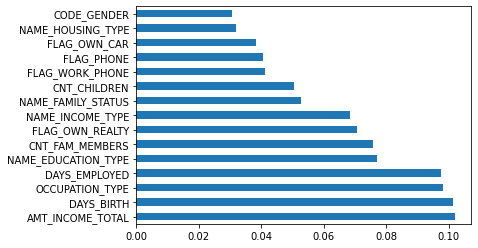

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xb, Yb)
feature_importances = pd.DataFrame({"Feature":X.columns,
              "Feature_Importance":model.feature_importances_})
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [28]:
feature_select=pd.merge(featureScores, feature_importances, on=["Feature"])
feature_select

,Feature,Score,Feature_Importance
0,CODE_GENDER,3.701434e+02,0.030760
1,FLAG_OWN_CAR,8.131217e+02,0.038196
2,FLAG_OWN_REALTY,1.487995e+03,0.070746
3,CNT_CHILDREN,9.776181e+02,0.050398
4,AMT_INCOME_TOTAL,1.708874e+06,0.102037
5,NAME_INCOME_TYPE,1.588202e+02,0.068532
6,NAME_EDUCATION_TYPE,2.023451e+02,0.077102
7,NAME_FAMILY_STATUS,1.836053e+01,0.052836
8,NAME_HOUSING_TYPE,1.028380e+02,0.031823
9,DAYS_BIRTH,2.231109e+02,0.101265


In [30]:
selected_features = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "OCCUPATION_TYPE", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", "NAME_EDUCATION_TYPE",
                     "FLAG_OWN_REALTY","NAME_INCOME_TYPE", "NAME_FAMILY_STATUS"]

Xb= Xb[selected_features]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xb, Yb, random_state=100, test_size=0.3)
print(X_train.shape)

(34596, 9)


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix, plot_roc_curve,roc_curve

In [125]:
model = {
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(),
    "SVM" : svm.SVC(kernel='rbf',probability=True)
}

conf_matx = []
result = pd.DataFrame(columns=['model','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

for a, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    confmat = pd.DataFrame(confusion_matrix(y_test,y_pred))
    conf_matx.append(confmat)
    
    result = result.append({'model':a,
                            'accuracy':accuracy_score(y_test, y_pred),
                            'presicion':precision_score(y_test, y_pred, average='weighted'),
                            'recall':recall_score(y_test, y_pred, average='weighted'),
                            'f1_score':f1_score(y_test, y_pred, average='weighted'),
                            'fpr':fpr, 
                            'tpr':tpr,
                            'auc':auc,
                            }, ignore_index=True)
        
result.set_index('model', inplace=True)

In [99]:
result

,accuracy,presicion,recall,f1_score,fpr,tpr
model,,,,,,
DecisionTree,0.982196,0.982219,0.982196,0.982195,"[0.0, 0.01164995936060688, 0.01192088864806285...","[0.0, 0.8080848777867311, 0.8216492076282568, ..."
RandomForest,0.986714,0.986722,0.986714,0.986714,"[0.0, 0.000812787862367922, 0.0008127878623679...","[0.0, 0.5658071447757185, 0.5660757453666398, ..."
KNN,0.956636,0.957268,0.956636,0.956617,"[0.0, 0.017610403684638308, 0.0357626659441885...","[0.0, 0.9065269943593876, 0.9531291968842331, ..."
SVM,0.544915,0.547166,0.544915,0.540574,"[0.0, 0.0, 0.0, 0.000270929287455974, 0.001083...","[0.0, 0.00013430029546065002, 0.00067150147730..."


In [100]:
conf_matx

[      0     1
 0  7224   158
 1   106  7340,
       0     1
 0  7269   113
 1    84  7362,
       0     1
 0  6922   460
 1   183  7263,
       0     1
 0  4745  2637
 1  4111  3335]

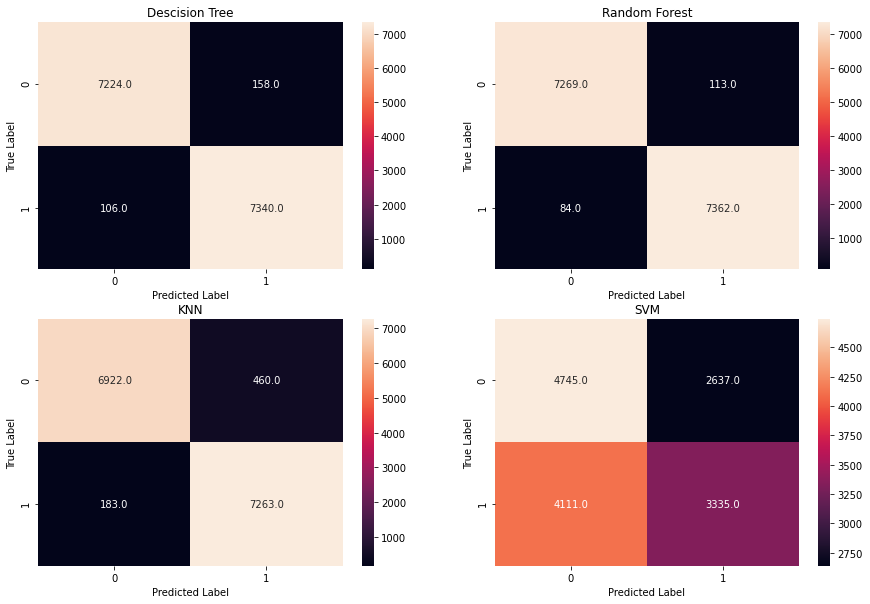

In [124]:
fig, axes = plt.subplots(2,2)
model=['Descision Tree', 'Random Forest', 'KNN', 'SVM']
fig.set_size_inches(15,10)
for m, ax in zip(range(4), axes.flatten()):
    g = sns.heatmap(conf_matx[m], fmt=".1f", annot=True, ax=ax)
    g.set_title(model[m])
    g.set_ylabel("True Label")
    g.set_xlabel("Predicted Label")

In [101]:
result.iloc[:,:4]

,accuracy,presicion,recall,f1_score
model,,,,
DecisionTree,0.982196,0.982219,0.982196,0.982195
RandomForest,0.986714,0.986722,0.986714,0.986714
KNN,0.956636,0.957268,0.956636,0.956617
SVM,0.544915,0.547166,0.544915,0.540574


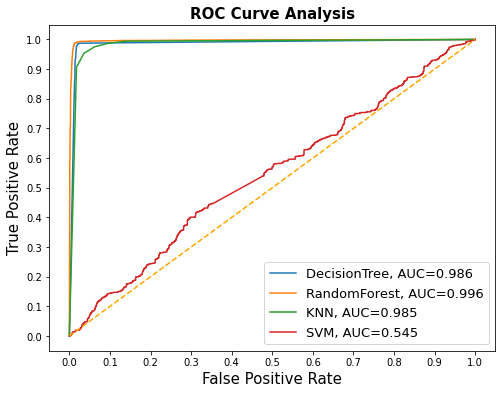

In [127]:
fig = plt.figure(figsize=(8,6))

for i in result.index:
    plt.plot(result.loc[i]['fpr'], 
             result.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()